# Groupwise analysis

In [18]:
import pandas as pd
pd.set_option("display.max_rows", 5)
reviews = pd.read_csv("input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)

In [4]:
# same 'point' value, different reviews
reviews.groupby('points').points.count()

points
80     397
81     692
      ... 
99      33
100     19
Name: points, Length: 21, dtype: int64

In [9]:
reviews.groupby('points').price.min()

points
80      5.0
81      5.0
       ... 
99     44.0
100    80.0
Name: price, Length: 21, dtype: float64

In [11]:
# keep the first title of each winery
reviews.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [14]:
# best wine by country and province
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  
country   province                                                       
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata  
          Other                            Malbec                Colomé  
...                                           ...                   ...  
Uruguay   San Jose                      Red Blend        Castillo Viejo  
          Uruguay           Tannat-Cabernet Franc               Narbona  

[425 rows x 13 columns]

In [16]:
reviews.groupby('country').price.agg([len, min, max])

,len,min,max
country,,,
Argentina,3800.0,4.0,230.0
Armenia,2.0,14.0,15.0
...,...,...,...
Ukraine,14.0,6.0,13.0
Uruguay,109.0,10.0,130.0


# Multi-indexes

groupby functions in pandas

    mean(): Compute mean of groups
    sum(): Compute sum of group values
    size(): Compute group sizes
    count(): Compute count of group
    std(): Standard deviation of groups
    var(): Compute variance of groups
    sem(): Standard error of the mean of groups
    describe(): Generates descriptive statistics
    first(): Compute first of group values
    last(): Compute last of group values
    nth() : Take nth value, or a subset if n is a list
    min(): Compute min of group values
    max(): Compute max of group values

In [33]:
# country and province unique values; one column is enough to count
countries_reviewed = reviews.groupby(['country','province']).description.agg([len])
countries_reviewed

len
country   province              
Argentina Mendoza Province  3264
          Other              536
...                          ...
Uruguay   San Jose             3
          Uruguay             24

[425 rows x 1 columns]

In [34]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

In [35]:
# reset index
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


# Sorting

In [36]:
# sort the above df by len
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len', ascending = True)

,country,province,len
179,Greece,Muscat of Kefallonian,1
192,Greece,Sterea Ellada,1
...,...,...,...
415,US,Washington,8639
392,US,California,36247


In [38]:
countries_reviewed.sort_values(by='len', ascending = False)

,country,province,len
392,US,California,36247
415,US,Washington,8639
...,...,...,...
63,Chile,Coelemu,1
149,Greece,Beotia,1


In [39]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


In [40]:
countries_reviewed.sort_values(by = ['country','province'])

,country,province,len
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


# Exercise

## 1.
Who are the most common wine reviewers in the dataset? Create a `Series` whose index is the `taster_twitter_handle` category from the dataset, and whose values count how many reviews each person wrote.

In [42]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [ ]:
# use description because description is unique value

In [64]:
reviews.groupby(['taster_twitter_handle']).description.agg([len]).len

taster_twitter_handle
@AnneInVino        3685
@JoeCz             5147
                   ... 
@winewchristina       6
@worldwineguys     1005
Name: len, Length: 15, dtype: int64

In [65]:
reviews_written = reviews.groupby(['taster_twitter_handle']).description.agg([len]).len

In [66]:
# Correct:

# reviews_written = reviews.groupby('taster_twitter_handle').size()
# or

# reviews_written = reviews.groupby('taster_twitter_handle').taster_twitter_handle.count()

In [67]:
reviews.groupby('taster_twitter_handle').size()

taster_twitter_handle
@AnneInVino        3685
@JoeCz             5147
                   ... 
@winewchristina       6
@worldwineguys     1005
Length: 15, dtype: int64

In [72]:
reviews.groupby('taster_twitter_handle').taster_twitter_handle.count()

taster_twitter_handle
@AnneInVino        3685
@JoeCz             5147
                   ... 
@winewchristina       6
@worldwineguys     1005
Name: taster_twitter_handle, Length: 15, dtype: int64

## 2.
What is the best wine I can buy for a given amount of money? Create a `Series` whose index is wine prices and whose values is the maximum number of points a wine costing that much was given in a review. Sort the values by price, ascending (so that `4.0` dollars is at the top and `3300.0` dollars is at the bottom).

In [74]:
reviews.groupby('price').points.max()

price
4.0       86
5.0       87
          ..
2500.0    96
3300.0    88
Name: points, Length: 390, dtype: int64

In [75]:
best_rating_per_price = reviews.groupby('price').points.max()


## 3.
What are the minimum and maximum prices for each `variety` of wine? Create a `DataFrame` whose index is the `variety` category from the dataset and whose values are the `min` and `max` values thereof.

In [77]:
reviews.groupby(['variety']).price.agg([min,max])

,min,max
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
...,...,...
Çalkarası,19.0,19.0
Žilavka,15.0,15.0


## 4.
What are the most expensive wine varieties? Create a variable `sorted_varieties` containing a copy of the dataframe from the previous question where varieties are sorted in descending order based on minimum price, then on maximum price (to break ties).

In [78]:
reviews.groupby(['variety']).price.agg([min,max]).sort_values(['min','max'], ascending = False)

,min,max
variety,,
Ramisco,495.0,495.0
Terrantez,236.0,236.0
...,...,...
Vital,NaN,NaN
Zelen,NaN,NaN


## 5.
Create a `Series` whose index is reviewers and whose values is the average review score given out by that reviewer. Hint: you will need the `taster_name` and `points` columns.

In [79]:
reviews.groupby(['taster_name']).points.mean()

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
                        ...    
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, Length: 19, dtype: float64

Are there significant differences in the average scores assigned by the various reviewers? Run the cell below to use the `describe()` method to see a summary of the range of values.

In [80]:
reviews.groupby(['taster_name']).points.mean().describe()

count    19.000000
mean     88.233026
           ...    
75%      88.975256
max      90.562551
Name: points, Length: 8, dtype: float64

In [81]:
import seaborn as sns

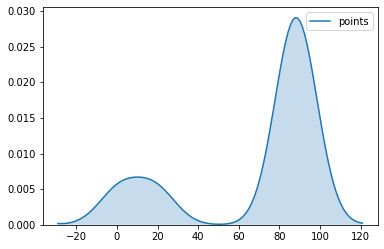

In [84]:
sns.kdeplot(data = reviews.groupby(['taster_name']).points.mean().describe(), shade = True)

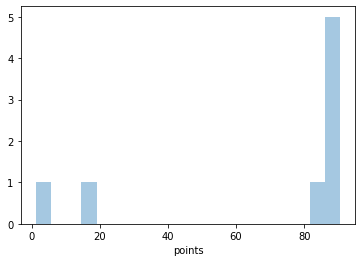

In [90]:
sns.distplot(a = reviews.groupby(['taster_name']).points.mean().describe(),bins=20 ,kde = False )

## 6.
What combination of countries and varieties are most common? Create a `Series` whose index is a `MultiIndex`of `{country, variety}` pairs. For example, a pinot noir produced in the US should map to `{"US", "Pinot Noir"}`. Sort the values in the `Series` in descending order based on wine count.

In [119]:
reviews.groupby(['country','variety']).agg([len]).winery.sort_values('len', ascending = False).len

country  variety           
US       Pinot Noir            9885
         Cabernet Sauvignon    7315
                               ... 
Mexico   Rosado                   1
Uruguay  White Blend              1
Name: len, Length: 1612, dtype: int64

In [124]:
reviews.groupby(['country', 'variety']).size().sort_values(ascending=False)

country    variety           
US         Pinot Noir            9885
           Cabernet Sauvignon    7315
                                 ... 
Italy      Moscato di Noto          1
Argentina  Barbera                  1
Length: 1612, dtype: int64